#Installing and Importing Libraries

In [21]:
!pip install GetOldTweets3

In [0]:
import GetOldTweets3 as got
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
from textblob import TextBlob

#Function to get Tweets

In [0]:
def username_tweets_to_csv(username, count):
  tweetCriteria = got.manager.TweetCriteria().setUsername(username).setMaxTweets(count)
  tweets = got.manager.TweetManager.getTweets(tweetCriteria)
  user_tweets = [[tweet.date, tweet.text] for tweet in tweets]
  tweets_df = pd.DataFrame(user_tweets, columns = ['Datetime', 'Text'])
  tweets_df.to_csv('{}-tweets.csv'.format(username), sep=',')

#Importing Data from Twitter Handle for analysis

#Analysis on @irso

In [0]:
username = 'isro'
count = 1000
username_tweets_to_csv(username, count)

In [84]:
!ls /content/*.csv

/content/BBCWorld-tweets.csv  /content/cnn-tweets.csv  /content/isro-tweets.csv


In [0]:
df = pd.read_csv('/content/isro-tweets.csv')

In [86]:
df.head()

,Unnamed: 0,Datetime,Text
0,0,2020-06-01 05:40:33+00:00,Congratulations to #NASA and #SpaceX for histo...
1,1,2020-05-16 13:10:32+00:00,Department of Space will follow Government gui...
2,2,2020-04-02 14:35:52+00:00,With the voluntary contribution from employees...
3,3,2020-03-04 09:50:33+00:00,"The launch of GISAT-1 onboard GSLV-F10, planne..."
4,4,2020-03-04 07:12:49+00:00,Watch this video https://youtu.be/KnNiSexRWhY ...


In [0]:
df=df.drop(['Unnamed: 0','Datetime'], 1)

# Data contains NaN type hence choosing new user

#Analysis on @BBCWorld

In [0]:
username = 'BBCWorld'
count = 1000
username_tweets_to_csv(username, count)

In [0]:
df = pd.read_csv('/content/BBCWorld-tweets.csv')

In [0]:
df=df.drop(['Unnamed: 0','Datetime'], 1)

#Sentiment Analysis

In [92]:
Sentiment = []
Score = []
i = 0

while (i < len(df['Text'])):
  sample = df['Text'][i]
  analysis = TextBlob(sample)

  if (analysis.sentiment.polarity >= 0.5):
    data1 = "Positive"
  elif (analysis.sentiment.polarity <= -0.5):
    data1 = "Negative"
  else:
    data1 = "Neutral"
  
  Sentiment.append(data1)
  Score.append(analysis.sentiment.polarity)
  i += 1
else :
  print("Done!")


Done!


#Adding Sentiment and Scores to Data Frame

In [0]:
df['Sentiment'] = Sentiment
df['Score'] = Score

In [94]:
df.head()

,Text,Sentiment,Score
0,"""Something's different now... enough people ar...",Neutral,0.1000
1,Afghans condemn Iran police after refugees die...,Neutral,0.0000
2,Novak Djokovic: US Open coronavirus protocols ...,Neutral,-0.0625
3,Washington DC braces for biggest demonstration...,Neutral,0.0000
4,What’s the advice on face masks at mass gather...,Neutral,0.0000


#Visualising Analysis Score

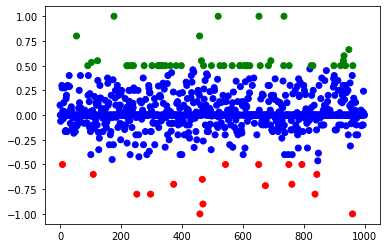

In [95]:
color = np.where(df["Sentiment"]== "Positive",'g', np.where(df["Sentiment"]== "Negative",'r','b'))
plt.scatter(df['Score'].index, df['Score'], c=color)

In [96]:
poscount = df[(df['Sentiment'] == "Positive")]["Sentiment"].count()
negcount = df[(df['Sentiment'] == "Negative")]["Sentiment"].count()
neucount = df[(df['Sentiment'] == "Neutral")]["Sentiment"].count()
print('Positive Sentiment = ',(poscount/1000)*100,'%')
print('Neutral Sentiment = ',(neucount/1000)*100,'%')
print('Negative Sentiment = ',(negcount/1000)*100,'%')

Positive Sentiment =  4.9 %
Neutral Sentiment =  93.4 %
Negative Sentiment =  1.7000000000000002 %


#Analysis of @elonmusk

In [0]:
username = 'elonmusk'
count = 1000
username_tweets_to_csv(username, count)

In [0]:
df = pd.read_csv('/content/elonmusk-tweets.csv')

In [0]:
df=df.drop(['Unnamed: 0','Datetime'], 1)

In [128]:
df['Text'] = str([cell.encode('utf-8') for cell in df['Text']])

AttributeError: ignored

#Sentiment Analysis

In [131]:
Sentiment = []
Score = []
i = 0

while (i < len(df['Text'])):
  sample = df['Text'][i]
  analysis = TextBlob(sample)

  if (analysis.sentiment.polarity >= 0.5):
    data1 = "Positive"
  elif (analysis.sentiment.polarity <= -0.5):
    data1 = "Negative"
  else:
    data1 = "Neutral"
  
  Sentiment.append(data1)
  Score.append(analysis.sentiment.polarity)
  i += 1
else :
  print("Done!")

TypeError: ignored

#Adding Sentiment and Scores to Data Frame

In [0]:
df['Sentiment'] = Sentiment
df['Score'] = Score

In [0]:
df.head()

#Visualising Analysis Score

In [0]:
color = np.where(df["Sentiment"]== "Positive",'g', np.where(df["Sentiment"]== "Negative",'r','b'))
plt.scatter(df['Score'].index, df['Score'], c=color)

In [0]:
poscount = df[(df['Sentiment'] == "Positive")]["Sentiment"].count()
negcount = df[(df['Sentiment'] == "Negative")]["Sentiment"].count()
neucount = df[(df['Sentiment'] == "Neutral")]["Sentiment"].count()
print('Positive Sentiment = ',(poscount/1000)*100,'%')
print('Neutral Sentiment = ',(neucount/1000)*100,'%')
print('Negative Sentiment = ',(negcount/1000)*100,'%')